<img src="../fasp/runner/credits/images/nb1.jpg" style="float: right;">

### TCGA and GTEx

This variant of the GTEX TCGA workflow uses FASPRunner which is simply called twice in succession with the relevant Search and WES clients. As the DRS ids returned by the searches are prefixed with CURIEs, DRSMetaResolver can be used as the DRS Client in both cases.



In [8]:
from fasp.search import DataConnectClient, Gen3ManifestClient
from fasp.loc import DRSMetaResolver, anvilDRSClient


from fasp.runner import FASPRunner

faspRunner = FASPRunner()
runNote = 'GTEX and TCGA via FASPRunner'

Running FASPNotebook17-GTEX_TCGA_Federated_Analysis.ipynb


The following sets clients to handle the TCGA data. Note that the DRS ids prefixed with CURIEs (crdc for the Cancer Research Data Commons and anv for Anvil). This indicates which namespace the ids come from and allows the referenced file to be retrieved from the correct DRS server. 

Note that for the data in the Google Cloud we are using GCPLSsamtools a fasp class which accesses Google Cloud's Life Science Pipeline API. The plan is to replace that with the DNA Stack WES server when that is updated. 

In [9]:
# TCGA Query - CRDC
crdcquery = """
    SELECT 'case_'||associated_entities__case_gdc_id case_id, 'crdc:'||file_id drs_id
    FROM search_cloud.cshcodeathon.gdc_rel24_filedata_active 
    where data_format = 'BAM' 
    and project_disease_type = 'Breast Invasive Carcinoma'
    limit 3"""

searchClient = DataConnectClient('https://ga4gh-search-adapter-presto-public.prod.dnastack.com/')
drsClient = DRSMetaResolver()

from fasp.workflow import GCPLSsamtools
settings = faspRunner.settings
gcplocation = 'projects/{}/locations/{}'.format(settings['GCPProject'], settings['GCPPipelineRegion'])
wesClient = GCPLSsamtools(gcplocation, settings['GCPOutputBucket'])

faspRunner.configure(searchClient, drsClient, wesClient)
runList = faspRunner.runQuery(crdcquery, runNote)


Searching the GA4GH registry for org.ga4gh:drs services
Running query

    SELECT 'case_'||associated_entities__case_gdc_id case_id, 'crdc:'||file_id drs_id
    FROM search_cloud.cshcodeathon.gdc_rel24_filedata_active 
    where data_format = 'BAM' 
    and project_disease_type = 'Breast Invasive Carcinoma'
    limit 3
_Retrieving the query_
____Page1_______________
____Page2_______________
____Page3_______________
____Page4_______________
____Page5_______________
subject=case_1b703058-e596-45bc-80fe-8b98d545c2e2, drsID=crdc:030e5e74-6461-4f05-a399-de8e470bc056
workflow submitted, run:9458808130744346475
____________________________________________________________
subject=case_a947a945-4721-45cc-bc45-13b8ea41c10e, drsID=crdc:04c68898-ddac-4e15-9f9a-5bf278d55e4a
workflow submitted, run:8831527384848446963
____________________________________________________________
subject=case_c462e422-eb8d-4daf-9897-2a9c6cbd783a, drsID=crdc:00589653-5840-4c11-8572-5aa7d00a73f8
workflow submitted, run:

A Search and WES client are then set up to work with the Anvil data

The Search client here  is a placeholder to search a local file. That file contains file ids downloaded as a manifest from the Gen3 Anvil portal. That list of files in that manifest had already been filtered to relevant samples. The anv: DRS prefix was added in an edited version of the file.

#Todo check what access_ids DRSMetaresolver is using for each run

In [10]:
from fasp.workflow import sbcgcWESClient
searchClient = Gen3ManifestClient('../fasp/data/gtex/gtex-cram-manifest.json')
drsClient = anvilDRSClient('~/.keys/anvil_credentials.json', '', 's3')
wesClient = sbcgcWESClient(settings['SevenBridgesProject'])

faspRunner.configure(searchClient, drsClient, wesClient)
runList2 = faspRunner.runQuery(3, runNote)


Running query
3
subject=GTEX-1GTWX-0001-SM-7J3A5.cram, drsID=dg.ANV0/76bb893d-12da-41ca-8828-ff89551d3e15
https://cgc-ga4gh-api.sbgenomics.com/ga4gh/wes/v1
workflow submitted, run:d8835331-cb3c-4c0d-8278-22fd80dada40
____________________________________________________________
subject=GTEX-14PQA-0003-SM-7DLH4.cram, drsID=dg.ANV0/66352de8-4b50-4cae-881d-b76d03df5ac8
https://cgc-ga4gh-api.sbgenomics.com/ga4gh/wes/v1
workflow submitted, run:5b76c15c-b871-4611-afff-953bd378d54f
____________________________________________________________
subject=GTEX-1B98T-0004-SM-7J38T.cram, drsID=dg.ANV0/ed9ac9ae-02da-4e97-93da-ad86aa77d227
https://cgc-ga4gh-api.sbgenomics.com/ga4gh/wes/v1
workflow submitted, run:ef535d65-0f56-4397-a69a-aaa6faf89554
____________________________________________________________


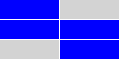

In [11]:
faspRunner.getFASPicon()

In [12]:
faspRunner.rollCredits()

DataConnectClient    Gen3ManifestClient       
DRSMetaResolver          anvilDRSClient           
GCPLSsamtools            sbcgcWESClient           
